In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from scipy.stats import skewnorm
from scipy.special import erfc
from scipy.integrate import quad

In [2]:
def emg(x, A, mu, sigma, tau):
    """Exponentially Modified Gaussian"""
    z = (x - mu) / sigma
    return A * (tau / 2) * np.exp((sigma ** 2) / (2 * tau ** 2) - z / tau) * erfc((sigma / np.sqrt(2) * tau) - (z / np.sqrt(2)))

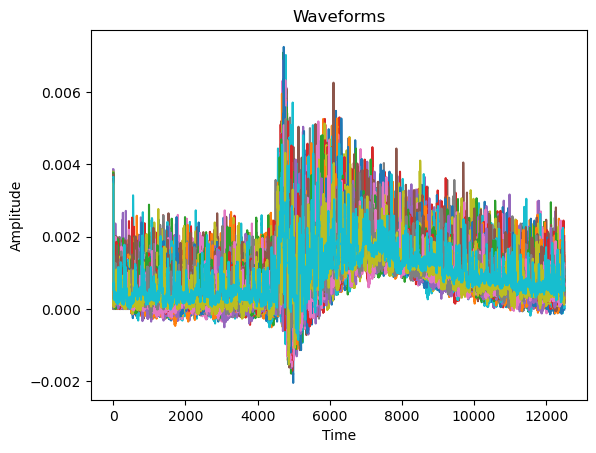

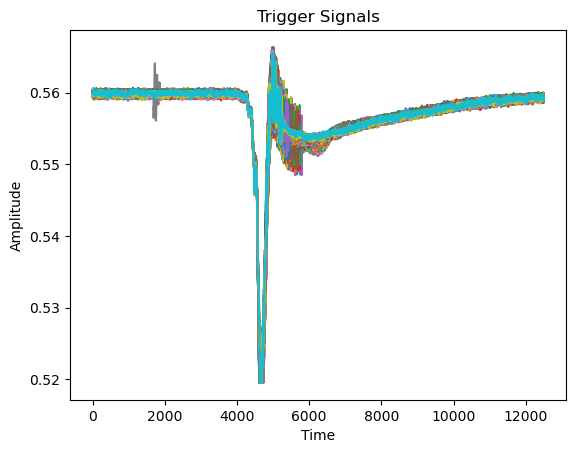

In [3]:
def read_data(filename, seg_len):
    filepath = "C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/MPhys Sem 1 SiPM-Scintillation (KeySight Oscilloscope)/"
    data = np.genfromtxt(filepath + filename, delimiter=',', skip_header=3)
    n_segs = len(data) // seg_len

    waveforms = np.zeros((n_segs, seg_len, 3))
    for i in range(n_segs):
        waveforms[i] = data[i*seg_len:(i+1)*seg_len]

    np.nan_to_num(waveforms[:,:,2], copy=False, nan=0)

    for waveform in waveforms:
        waveform[:,2] += np.abs(np.min(waveform[:,2][0:500]))
        plt.plot(waveform[:, 2])

    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Waveforms")
    #plt.xlim(5800,6400)
    plt.show()

    for waveform in waveforms:
        plt.plot(waveform[:, 1])

    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Trigger Signals")
    #plt.xlim(5800,6400)
    plt.show()

    return waveforms, n_segs

waveforms1100, n_segs1100 = read_data("1100V_Ar_VUV_SiPM (06,12,2024).csv", 12500)

C:\Users\louis\AppData\Local\Temp\ipykernel_9660\324479934.py:4: RuntimeWarning: overflow encountered in exp
  return A * (tau / 2) * np.exp((sigma ** 2) / (2 * tau ** 2) - z / tau) * erfc((sigma / np.sqrt(2) * tau) - (z / np.sqrt(2)))


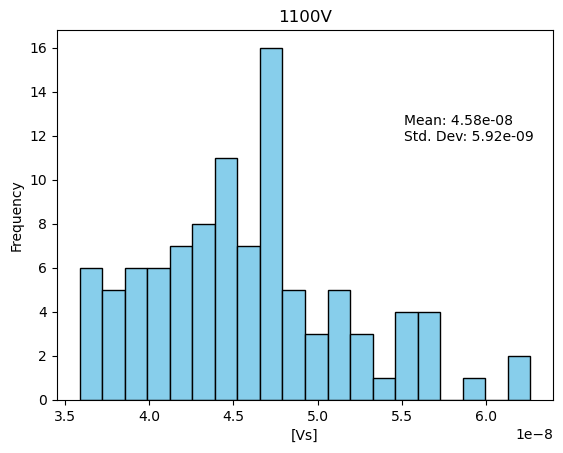

[4.762014322239208e-08,
 4.824660486608717e-08,
 4.5921391955492975e-08,
 5.195691891908261e-08,
 4.266236743903824e-08,
 5.58015238465322e-08,
 4.8689772360142006e-08,
 5.365756260936884e-08,
 4.4870057771151314e-08,
 4.5691433931686404e-08,
 4.203881289088369e-08,
 4.49541939408362e-08,
 4.0836713647088294e-08,
 5.042935879339158e-08,
 5.237886588618371e-08,
 5.081964581854561e-08,
 3.667654026767986e-08,
 4.0539153799648716e-08,
 5.156989557758272e-08,
 3.585577857609006e-08,
 4.4138438826542e-08,
 4.434439808196537e-08,
 4.45885132157232e-08,
 3.6262600740366317e-08,
 5.864467268646264e-08,
 4.236831130430702e-08,
 4.6675650998095544e-08,
 4.43715622510702e-08,
 4.116852744451868e-08,
 4.06163269016365e-08,
 4.4315615283464404e-08,
 4.1868480824982114e-08,
 4.876702984053928e-08,
 5.126285319402436e-08,
 4.6919410650031913e-08,
 3.879082834847845e-08,
 4.717449180441161e-08,
 4.358098681470925e-08,
 4.995008239945707e-08,
 4.644877234705419e-08,
 4.373510189306569e-08,
 4.535852946

In [7]:
def integrate(waveforms, n_segs):
    areas = []  # Store the area for each waveform

    for i in range(n_segs):
        # Extract x and y data for the current waveform
        x_data = waveforms[i, :, 0]
        y_data = waveforms[i, :, 2]

        # Initial guesses for the EMG fit
        initial_guess = [0.003, x_data[np.argmax(y_data)], 1e-5, 1]

        # Fit the EMG model
        params, _ = curve_fit(emg, x_data, y_data, p0=initial_guess, maxfev=100000)

        # Integrate the EMG model over the range of x_data
        area, _ = quad(emg, x_data[0], x_data[-1], args=tuple(params))
        areas.append(area)

        # Optional: Plot individual fits (uncomment for debugging)
        #fitted_peak = emg(x_data, *params)
        #plt.plot(x_data, y_data, '.', label="Noisy Data")
        #plt.plot(x_data, fitted_peak, label="Fitted EMG", linewidth=2)
        #plt.legend()
        #plt.show()

    mean = np.mean(areas)
    std_dev = np.std(areas)

    # Plot a histogram of the areas
    plt.hist(areas, bins=20, color='skyblue', edgecolor='black')
    plt.title("1100V")
    plt.xlabel("[Vs]")
    plt.ylabel("Frequency")
    plt.annotate(f"Mean: {mean:.2e}\nStd. Dev: {std_dev:.2e}", xy=(0.7, 0.7), xycoords='axes fraction')
    plt.show()

    return areas

integrate(waveforms1100, n_segs1100)